In [4]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

In [5]:
from scipy import ndimage
from scipy.ndimage.filters import convolve
import math

In [6]:
img = cv2.imread('messi.png',0)

In [7]:
#convert the image to grayscale pixel by pixel
def getGrayScaledPixel(rgbPixel):
    return 0.2126 * rgbPixel[0] + 0.7152 * rgbPixel[1] + 0.0722 * rgbPixel[2]

In [8]:
#deriving the gaussian filter (5x5)
def gaussian_filter(size, sigma=1.4):
  size = int(size)//2
  x,y = np.mgrid[-size:size+1, -size:size+1]
  normal = 1/(2 * np.pi * sigma **2)
  g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
  return g

In [9]:
#applying sobel filter to the image
def sobel_filters(img):

        M,N = img.shape
        I = np.zeros((M,N), dtype=np.int32)
        G = np.zeros((M,N), dtype=np.int32)
        #Sobel Filter applied on the X-axis
        Kx = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
        #Sobel Filter applied on the Y-axis
        Ky = [[1, 2, 1], [0, 0, 0], [-1, -2, -1]]

        Ix = ndimage.filters.convolve(img, Kx)

        Iy = ndimage.filters.convolve(img, Ky)

        #for i in range(0,M-1):
         #for j in range(0,N-1):
          #I[i,j] = (Ix[i,j]*Ix[i,j]) + (Iy[i,j]*Iy[i,j])
          #G[i,j] = math.sqrt(I[i,j])

        G = np.hypot(Ix, Iy)
        #G = G / G.max() * 255
        theta = np.arctan2(Iy, Ix)
        return (G, theta)

In [10]:
def non_supression(img,D):
  M,N=img.shape
  Z = np.zeros((M,N), dtype=np.int32)
  angle = D*180/np.pi
  angle[angle<0]+=180

  for i in range(0,M-1):
    for j in range(0,N-1):
      q=255
      r=255
      if((0<= angle[i,j] <22.5) or (157.5<=angle[i,j]<=180)):
        q = angle[i,j+1]
        r= angle[i,j-1]
      elif(22.5<=angle[i,j]<=67.5):
        q = angle[i+1,j-1]
        r= angle[i-1,j+1]
      elif (67.5 <= angle[i,j] < 112.5):
        q = img[i+1, j]
        r = img[i-1, j]
      
      elif (112.5 <= angle[i,j] < 157.5):
        q = img[i-1, j-1]
        r = img[i+1, j+1]
      if (img[i,j] >= q) and (img[i,j] >= r):
        Z[i,j] = img[i,j]
      else:
        Z[i,j] = 0

  return Z

In [24]:
  def threshold(img, highThreshold=0.15, lowThreshold=0.05, strong_pixel=255, weak_pixel=75):

      highThreshold = 190
      
      lowThreshold = 50
      M, N = img.shape
      res = np.zeros((M,N), dtype=np.int32)

      for i in range(0,M-1):
        for j in range(0,N-1):
          if(img[i,j]<lowThreshold):
            res[i,j]=0
          elif(lowThreshold<=img[i,j]<highThreshold):
            res[i,j] = weak_pixel
          elif(img[i,j]>highThreshold):
            res[i,j]=strong_pixel

      return (res)

In [25]:
def hysteresis(img,strong_pixel=255, weak_pixel=75):
  M,N = img.shape
  canny = np.zeros((M,N), dtype = np.int32)

  weak = weak_pixel
  strong = strong_pixel
  for i in range(0,M-1):
    for j in range(0,N-1):
      if(img[i,j]==weak):
        if((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong) or (img[i, j-1] == strong) or (img[i, j+1] == strong) or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
          canny[i,j]=strong
        else:
          canny[i,j]=0
  
  canny = canny / canny.max() * 255
  return(canny)

In [26]:
pixel = np.array(img)
if len(pixel.shape) == 3:
        output = convertToGrayScale(pixel)
else:
        output = pixel.copy()

In [27]:
F = gaussian_filter(5)

In [28]:
gaussian = ndimage.filters.convolve(output, F)

In [29]:
sobel, theta= sobel_filters(output)

In [30]:
sobel = sobel.astype(int)

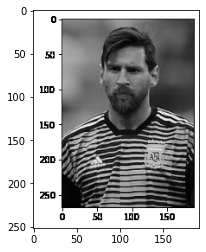

In [31]:
arr = np.asarray(img)
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.show()

In [38]:
non_supressed=non_supression(sobel,theta)

In [37]:
thresh = threshold(non_supressed)

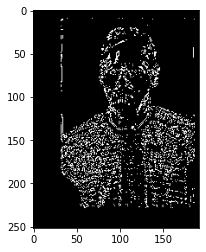

In [36]:
final_image = hysteresis(thresh)
arr = np.asarray(final_image)
plt.imshow(arr,cmap='gray',vmin=0, vmax=255)
plt.show()